In [41]:
import os
from PIL import Image
directorio = "/Users/vivi/Google Drive/ITBA/imagenes"
directorio2 = "/Users/vivi/Google Drive/ITBA/imagenes"

#directorio = "/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/"
#directorio2 = "/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes/Landsat8/"

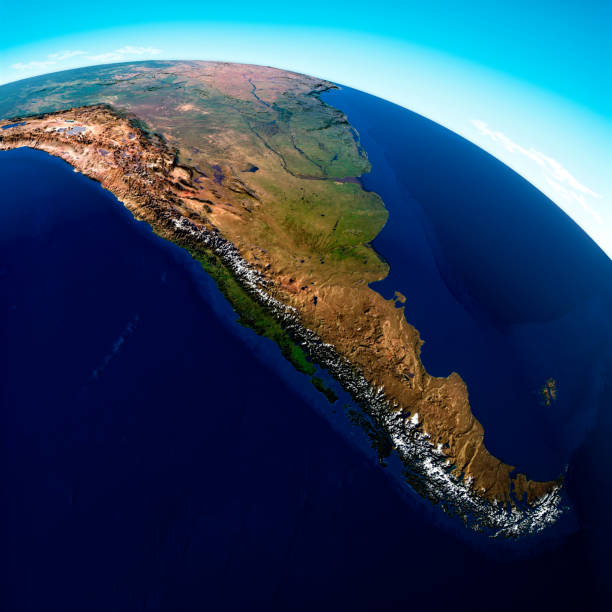

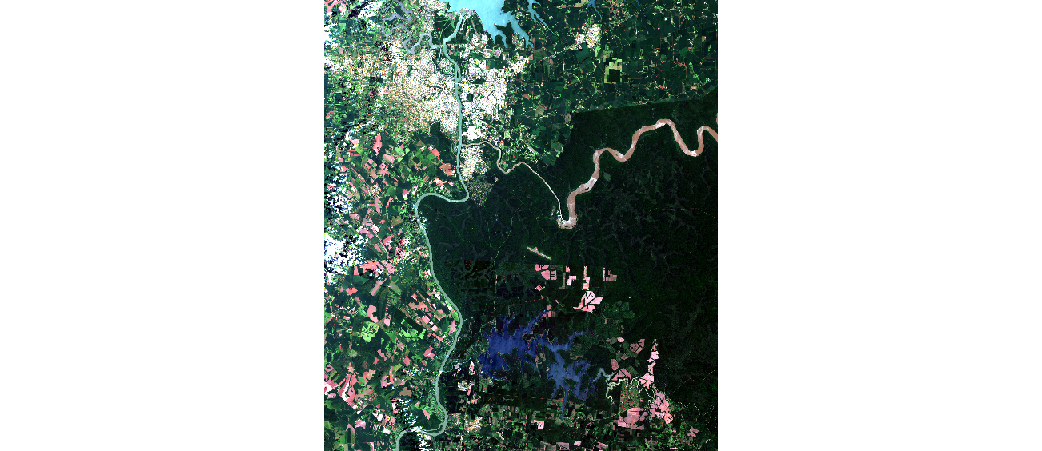

In [42]:
# 2a)
# mostramos la imagen 


# Armamos las rutas completas
ruta_img1 = os.path.join(directorio, "argentina.jpg")
ruta_img2 = os.path.join(directorio2, "LC08_224-078_2018-01-05_RGB.png")

# Abrimos las imágenes
img = Image.open(ruta_img1)
img2 = Image.open(ruta_img2)

# Mostramos las imágenes
display(img)
display(img2)




In [43]:
# Definimos el nombre del nuevo archivo
nombre_archivo = "argentina2.jpg"

# Armamos la ruta completa
ruta_salida = os.path.join(directorio, nombre_archivo)

# Guardamos la imagen
img.save(ruta_salida)

In [44]:
# 2c)
# Acá verificamos que la imagen satelital es de 4 canales, siendo el 4to el Alpha (transparencia). Algo comun en las imágenes png. 
# una imagen JPG tiene 3 canales.
print("Imagen 1 es: ", img.mode) 
print("Imagen 2 es: ", img2.mode)

# Obtener el valor de un pixel en la imagen
pixel_img = img.getpixel((200, 150))
pixel_img2 = img2.getpixel((353, 353))
print(f"Valor del pixel en (353, 353): {pixel_img}")
print(f"Valor del pixel en (200, 150): {pixel_img2}")

# Esto nos devuelve el valor de la tupla para cada una de las posiciones. Podemos ver que para la imagen 1 es de 3 bandas (RGB) y para la imagen 2 es de 4 bandas (RGBA).

Imagen 1 es:  RGB
Imagen 2 es:  RGBA
Valor del pixel en (353, 353): (135, 109, 92)
Valor del pixel en (200, 150): (104, 162, 97, 255)


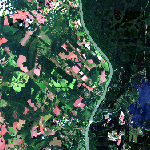

In [45]:
# 2d) Copiar una parte de la imagen en otra imagen nueva
img_cortada = img2.crop((350, 250, 500, 400)).convert("RGB")  # (left, upper, right, lower)
display(img_cortada)

In [46]:
#2e)
# Guardar la imagen cortada en un nuevo archivo
# Definimos el nombre del archivo de salida
nombre_corte = "imagen_cortada.png"

# Armamos la ruta completa
ruta_corte = os.path.join(directorio, nombre_corte)

# Guardamos la imagen cortada
img_cortada.save(ruta_corte)

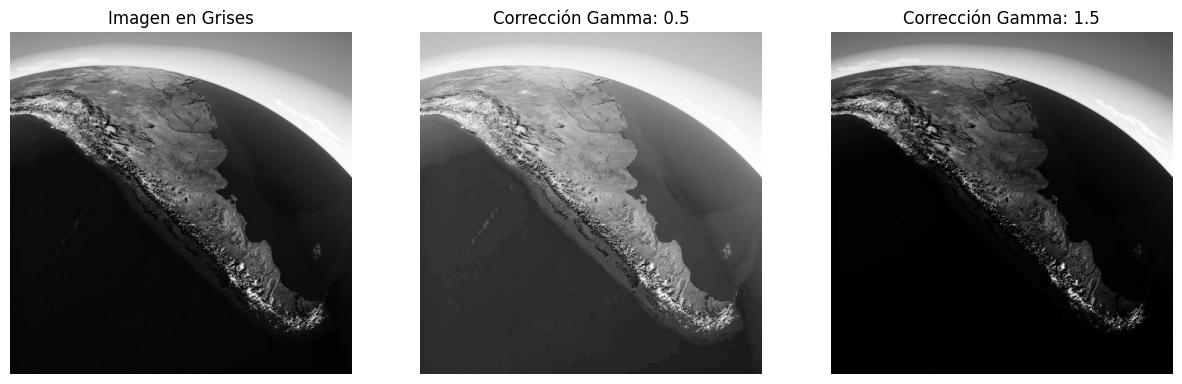

In [47]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# usamos convert para pasar la imagen 1 a niveles de gris.
img_gris = img.convert("L")

# definimos una función de corrección gamma.
# metemos la imagen en un array de numpy, aplicamos la corrección gamma y volvemos a convertir a imagen.
def correccion_gamma(img, gamma):
    img_array = np.array(img)
    # normalizamos, aplicamos gama y reescalamos nuevamente para mostrarlo. Por que la corrección gamma se hace sobre valores entre 0 y 1.
    out = (img_array / 255) ** (gamma) * 255 # esta es la corrección 
    return Image.fromarray(np.uint8(out)) # hay que convertir a uint8 para que sea una imagen válida
valores_gamma = [0.5, 1.5]
plt.figure(figsize=(15, 5))
plt.subplot(1, len(valores_gamma) + 1, 1)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en Grises')
plt.axis('off')
for i, gamma in enumerate(valores_gamma):
    img_gamma = correccion_gamma(img_gris, gamma)
    plt.subplot(1, len(valores_gamma) + 1, i + 2)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f'Corrección Gamma: {gamma}')
    plt.axis('off')

plt.show()

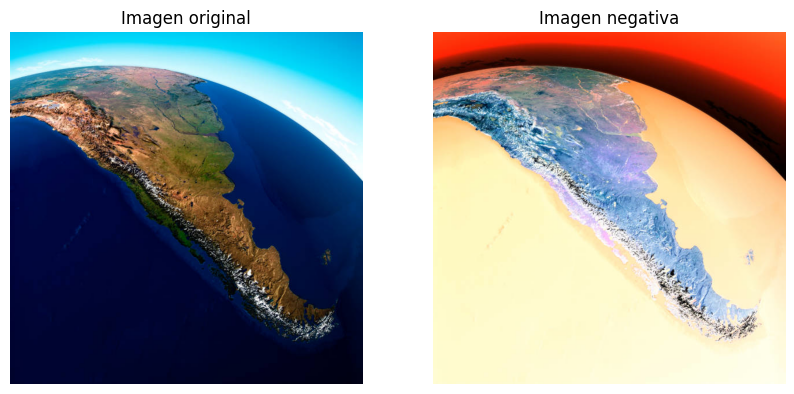

In [48]:
#4
# Función que calcula el negativo de una imagen RGB
def negativo_rgb(img):
    # Convertimos a array numpy
    img_array = np.array(img)
    # Aplicamos negativo: 255 - valor
    negativo_array = 255 - img_array
    # Reconstruimos imagen
    return Image.fromarray(negativo_array)

# Aplicamos la función
img_negativa = negativo_rgb(img)

# Mostramos imagen original y negativa
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_negativa)
plt.title("Imagen negativa")
plt.axis("off")

plt.show()


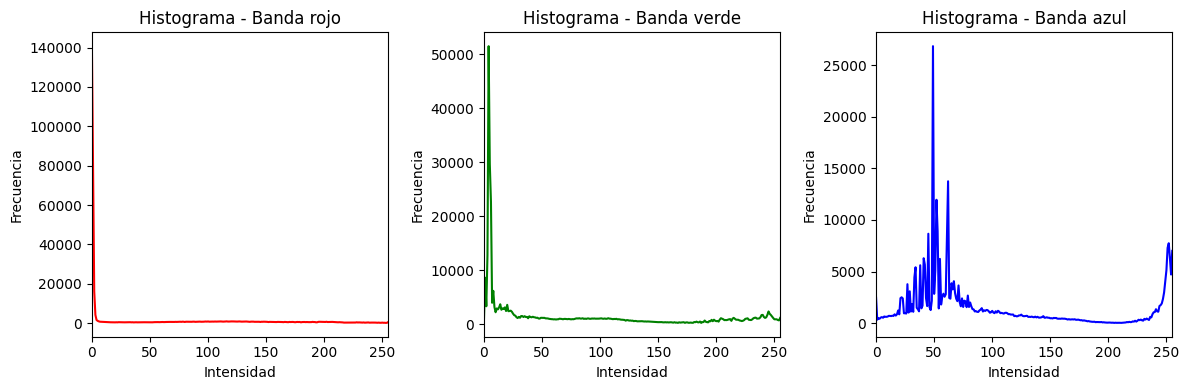

In [49]:
#5
# Función que calcula y muestra el histograma de cada banda RGB
def mostrar_histogramas_rgb(img):
    img_array = np.array(img)

    bandas = ('rojo', 'verde', 'azul')
    colores = ('red', 'green', 'blue')

    plt.figure(figsize=(12, 4))

    for i in range(3):
        banda = img_array[:, :, i]
        hist, _ = np.histogram(banda, bins=256, range=(0, 255))

        plt.subplot(1, 3, i + 1)
        plt.plot(hist, color=colores[i])
        plt.title(f'Histograma - Banda {bandas[i]}')
        plt.xlim(0, 255)
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# 🔽 Llamamos a la función directamente sobre la imagen img
mostrar_histogramas_rgb(img)

In [50]:
#6

def umbralizar_por_banda(img, umbral):
    # Convertimos imagen a array numpy
    img_array = np.array(img)

    # Separar los tres canales
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

    # Aplicamos el umbral a cada banda
    r_bin = np.where(r >= umbral, 255, 0).astype(np.uint8)
    g_bin = np.where(g >= umbral, 255, 0).astype(np.uint8)
    b_bin = np.where(b >= umbral, 255, 0).astype(np.uint8)

    # Convertimos cada uno en imagen PIL
    r_img = Image.fromarray(r_bin, mode="L")
    g_img = Image.fromarray(g_bin, mode="L")
    b_img = Image.fromarray(b_bin, mode="L")

    return r_img, g_img, b_img


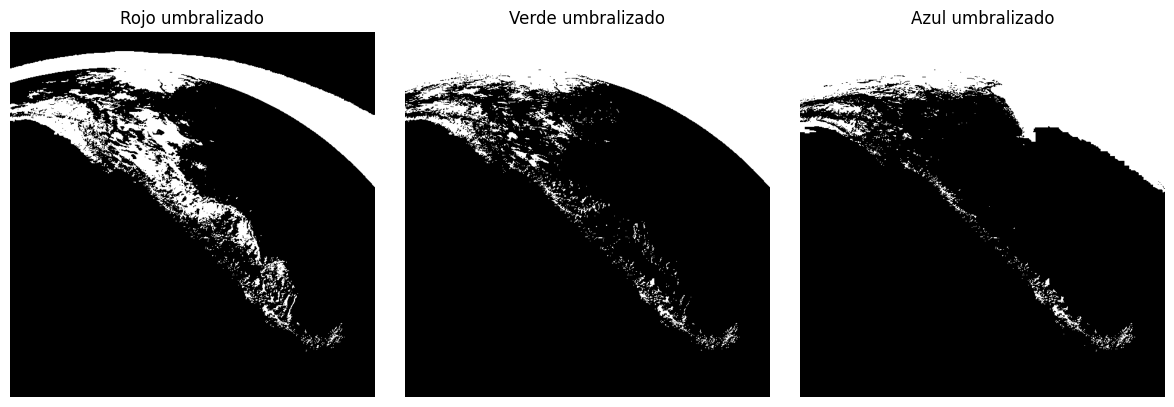

In [58]:
# Umbral deseado (por ejemplo 128)
umbral = 128

# Aplicamos la función
r_binaria, g_binaria, b_binaria = umbralizar_por_banda(img, umbral)

# Mostramos los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r_binaria, cmap="gray")
plt.title("Rojo umbralizado")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_binaria, cmap="gray")
plt.title("Verde umbralizado")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_binaria, cmap="gray")
plt.title("Azul umbralizado")
plt.axis("off")

plt.tight_layout()
plt.show()


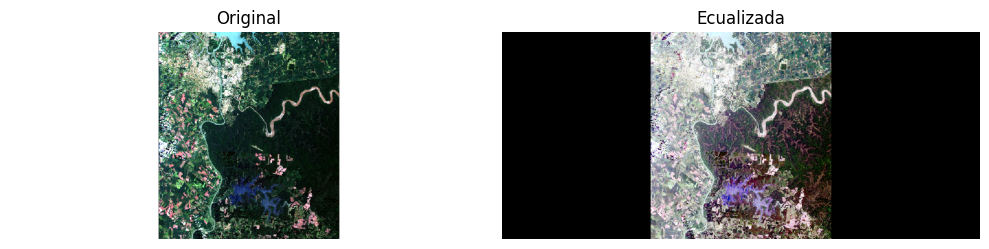

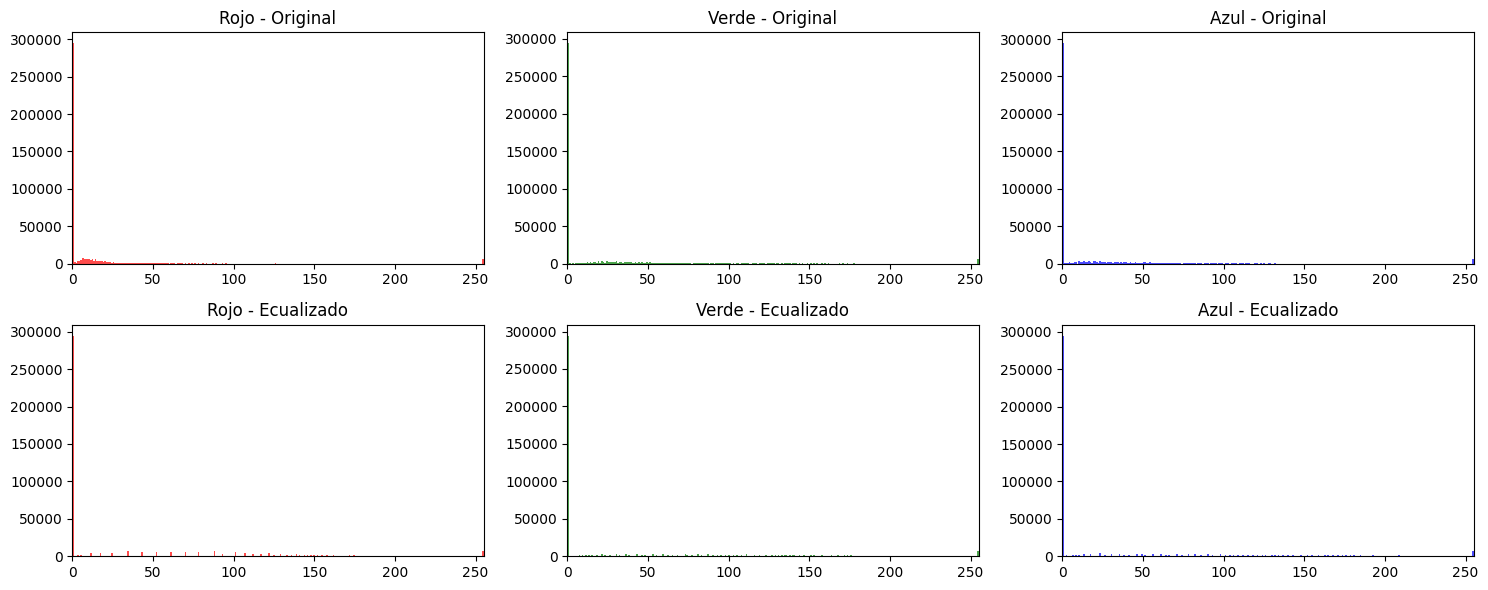

In [78]:
#7 bis

# --- FUNCIONES ---

# Ecualiza una sola banda (grayscale)
def ecualizar_banda(banda):
    hist, bins = np.histogram(banda.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalizada = 255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())
    cdf_normalizada = cdf_normalizada.astype(np.uint8)
    return np.take(cdf_normalizada, banda)
#    return cdf_normalizada[banda]

# Ecualiza una imagen RGB banda por banda
def ecualizar_imagen_rgb(img):
    img_array = np.array(img)
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    r_eq = ecualizar_banda(r)
    g_eq = ecualizar_banda(g)
    b_eq = ecualizar_banda(b)
    #img_eq = np.stack((r_eq, g_eq, b_eq), axis=2)
    img_eq = np.stack((r_eq, g_eq, b_eq), axis=2)  # 
    
    return Image.fromarray(img_eq), (r, g, b), (r_eq, g_eq, b_eq)

# Muestra los histogramas antes y después
def mostrar_histogramas_comparados(bandas_originales, bandas_ecualizadas):
    nombres = ["Rojo", "Verde", "Azul"]
    colores = ["red", "green", "blue"]
    
    plt.figure(figsize=(15, 6))

    for i in range(3):
        # Histograma original
        plt.subplot(2, 3, i + 1)
        plt.hist(bandas_originales[i].flatten(), bins=256, range=(0, 255), color=colores[i], alpha=0.7)
        plt.title(f'{nombres[i]} - Original')
        plt.xlim(0, 255)

        # Histograma ecualizado
        plt.subplot(2, 3, i + 4)
        plt.hist(bandas_ecualizadas[i].flatten(), bins=256, range=(0, 255), color=colores[i], alpha=0.7)
        plt.title(f'{nombres[i]} - Ecualizado')
        plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

# --- EJECUCIÓN ---

# Aplicamos ecualización
img_ecualizada, bandas_orig, bandas_eq = ecualizar_imagen_rgb(img2)

# Mostramos las imágenes original y ecualizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_ecualizada)
plt.title("Ecualizada")
plt.axis("off")
plt.tight_layout()
plt.show()

# Mostramos histogramas antes y después
mostrar_histogramas_comparados(bandas_orig, bandas_eq)



## Ecualizar_banda: 
Esta función toma una banda de una imagen (por ejemplo, el canal rojo) y le aplica ecualización de histograma:

banda.flatten(): Convierte la imagen 2D (una matriz) en un vector de una sola fila, solo para poder contar con facilidad los valores.

hist, bins = np.histogram(..., bins=256, range=(0, 256)): Crea el histograma de la imagen:
    hist: dice cuántos píxeles hay con cada valor entre 0 y 255.
    bins: los "bordes" de cada casillero (no lo usamos después).
    Por ejemplo, si hay muchos píxeles con intensidad 100, hist[100] va a tener un valor alto.

cdf = hist.cumsum(): obtiene la función de distribución acumulada (CDF). ¿Cuántos píxeles hay con intensidad menor o igual a cierto valor? Sirve para redistribuir los valores de intensidad de modo que los valores más comunes ocupen más espacio visual.

cdf_normalizada = 255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())
Este paso normaliza la CDF para que sus valores vayan de 0 a 255.
Esto crea una tabla que asocia cada intensidad original con una nueva intensidad más distribuida, es decir, más contraste.

cdf_normalizada = cdf_normalizada.astype(np.uint8)
Convierte los valores a enteros entre 0 y 255, que es el tipo de dato que usan las imágenes (uint8 = unsigned integer de 8 bits).

cdf_normalizada[banda]: aplica el mapeo transformando cada valor original por su valor ecualizado.


## Ecualizar_imagen:

Esta función:

Convierte la imagen RGB a un array NumPy.

Separa las tres bandas: rojo (R), verde (G), azul (B).

Aplica ecualizar_banda() a cada una.

Usa np.stack(...) para recombinar las tres bandas ecualizadas en una sola imagen RGB.

Devuelve:

La imagen ecualizada como Image.fromarray(...).

Las bandas originales y ecualizadas (para mostrar sus histogramas después). 


**La ecualización de histograma mejora el contraste de una imagen redistribuyendo los valores de intensidad. En una imagen RGB, se puede aplicar a cada banda (R, G, B) por separado.
Esto mejora el contraste, sobre todo si la imagen tiene rangos estrechos de intensidad.**


**se aplico la ecualizacion de histograma clasica, pero se pueden probar con otros tipos de ecualizacion, como Ecualización sobre el canal de luminancia (Y o V) o Ecualización adaptativa (CLAHE - Contrast Limited Adaptive Histogram Equalization)**

---

## En este caso se concluye que 


Observación visual

    Imagen original (izquierda):
        Tonos más oscuros y suaves.
        Buena preservación del color natural.
        Algunas zonas tienen poco contraste (por ejemplo, el área de vegetación oscura en la parte inferior).

    Imagen ecualizada (derecha):
        Contraste más alto: se distinguen mucho mejor las curvas del río, los caminos y las zonas deforestadas.
        Se resaltan detalles que antes estaban ocultos en la oscuridad.
        Sin embargo, aparecen zonas quemadas o sobreexpuestas (muy claras, especialmente arriba).

        
Conclusiones

    1. La ecualización mejoró el contraste general
        Detalles como caminos, ríos y bordes entre zonas claras/oscuras ahora son mucho más visibles.
        Áreas boscosas densas que antes eran completamente oscuras ahora muestran más textura.

    2. Pero también se introdujeron problemas:
        Algunas zonas quedaron demasiado claras, perdiendo información por sobresaturación (efecto “quemado”).
        La saturación del color se alteró, lo que puede hacer que la imagen pierda realismo o valor analítico, sobre todo si se quieren hacer mediciones o comparaciones cuantitativas.

    3. La ecualización por banda RGB tiene límites
        cada canal cambia por separado, lo que puede alterar los colores reales (lo que era verde, por ejemplo, puede volverse rosado).

Para imágenes satelitales, lo ideal suele ser:

    Ecualizar solo la luminancia (Y o V) para no tocar el color.
    O usar técnicas adaptativas como CLAHE si hay muchas diferencias locales.

Conclusión final
    La ecualización del histograma fue útil para resaltar estructuras y mejorar el contraste global de la imagen. Sin embargo, al aplicarla por canal RGB, modificó la percepción cromática y generó zonas sobreexpuestas. Esto muestra que la ecualización debe aplicarse con cuidado, especialmente en imágenes satelitales donde el color tiene un significado técnico.





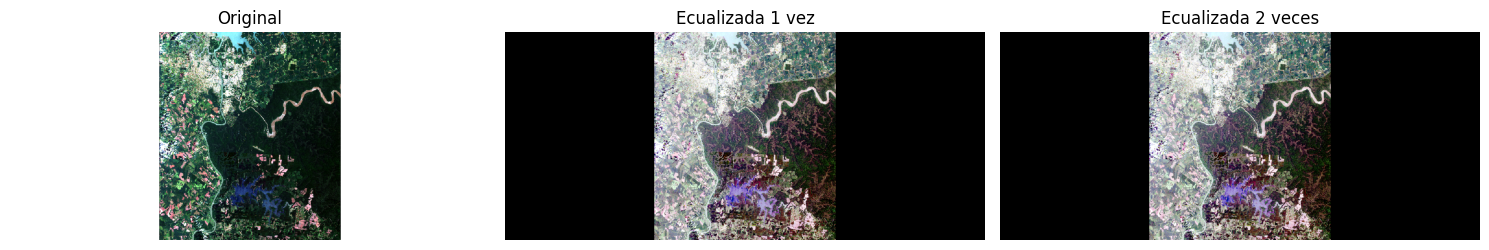

In [79]:
# Segunda ecualización
img_ecualizada_2, bandas_eq_1, bandas_eq_2 = ecualizar_imagen_rgb(img_ecualizada)

# Mostramos las imágenes: original, ecualizada 1 vez y ecualizada 2 veces
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img2)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_ecualizada)
plt.title("Ecualizada 1 vez")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_ecualizada_2)
plt.title("Ecualizada 2 veces")
plt.axis("off")

plt.tight_layout()
plt.show()


Aplicar una segunda ecualización a una imagen ya ecualizada no mejora más el contraste, ni modifica significativamente la imagen. Esto ocurre porque la primera ecualización ya redistribuyó los valores de intensidad de forma uniforme en todo el rango (0–255).
Como el histograma ya está "estirado", la función de ecualización ya no tiene efecto la segunda vez. Es decir, la segunda ecualización es prácticamente una operación neutra.

In [ ]:
#9


# Función para agregar ruido gaussiano aditivo
def agregar_ruido_gaussiano(img, porcentaje, media=0, sigma=20):
    img_array = np.array(img).astype(np.float32)
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    # Creamos máscara aleatoria de píxeles a alterar
    indices = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    ruido = np.random.normal(media, sigma, cantidad_ruido)

    img_flat = img_array.reshape(-1, 3)
    img_flat[indices] += ruido[:, None]  # mismo ruido para R, G, B
    img_ruidosa = img_flat.reshape(img_array.shape)
    
    # Limitamos al rango válido y convertimos a uint8
    img_ruidosa = np.clip(img_ruidosa, 0, 255).astype(np.uint8)
    return Image.fromarray(img_ruidosa)

# Función para agregar ruido exponencial multiplicativo
def agregar_ruido_exponencial(img, porcentaje, lam=0.5):
    img_array = np.array(img).astype(np.float32)
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    indices = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    ruido = np.random.exponential(scale=1/lam, size=cantidad_ruido)

    img_flat = img_array.reshape(-1, 3)
    img_flat[indices] *= ruido[:, None]  # mismo ruido para R, G, B
    img_ruidosa = img_flat.reshape(img_array.shape)

    img_ruidosa = np.clip(img_ruidosa, 0, 255).astype(np.uint8)
    return Image.fromarray(img_ruidosa)




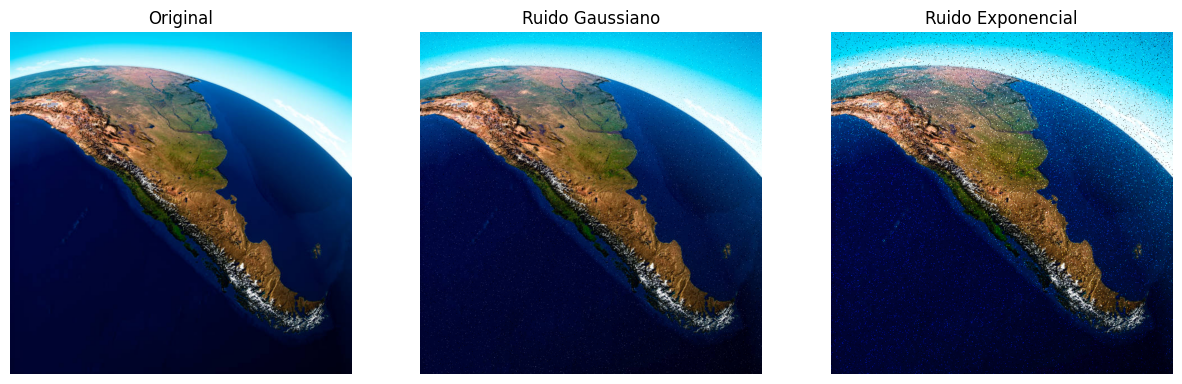

In [88]:
# Parámetros
porcentaje = 0.10  # 10% de píxeles con ruido
media = 0
sigma = 25
lam = 0.5

# Agregar ruido
img_gauss = agregar_ruido_gaussiano(img, porcentaje, media, sigma)
img_expon = agregar_ruido_exponencial(img, porcentaje, lam)

# Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gauss)
plt.title("Ruido Gaussiano")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_expon)
plt.title("Ruido Exponencial")
plt.axis("off")

plt.show()


In [91]:
#10

def agregar_ruido_sal_pimienta(img, porcentaje):
    img_array = np.array(img).copy()
    total_pixeles = img_array.shape[0] * img_array.shape[1]
    cantidad_ruido = int(total_pixeles * porcentaje)

    # Seleccionamos aleatoriamente los píxeles a corromper
    coords = np.random.choice(total_pixeles, cantidad_ruido, replace=False)
    coords_2d = np.unravel_index(coords, (img_array.shape[0], img_array.shape[1]))

    # La mitad será sal (255), la otra mitad pimienta (0)
    mitad = cantidad_ruido // 2
    coords_sal = (coords_2d[0][:mitad], coords_2d[1][:mitad])
    coords_pimienta = (coords_2d[0][mitad:], coords_2d[1][mitad:])

    # Aplicamos el ruido
    img_array[coords_sal] = [255, 255, 255]    # sal
    img_array[coords_pimienta] = [0, 0, 0]      # pimienta

    return Image.fromarray(img_array)


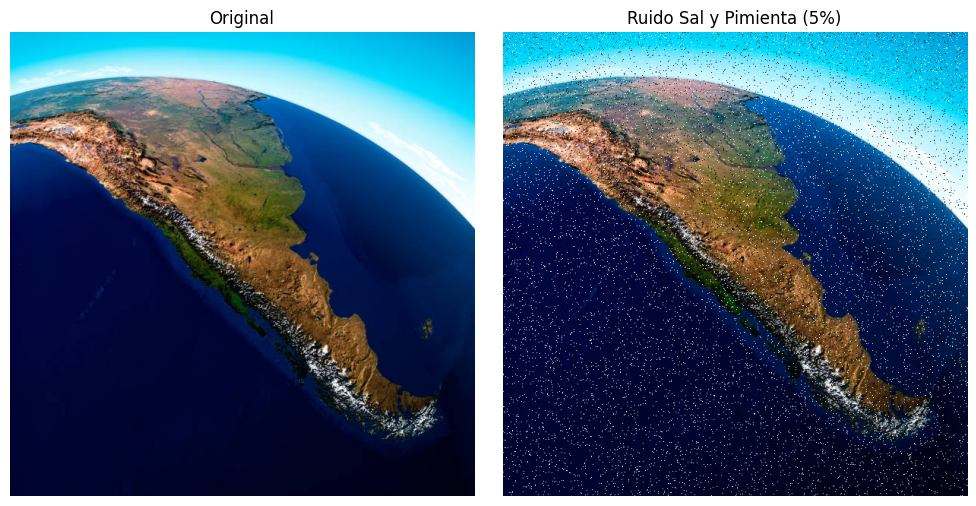

In [95]:
# Parámetro
porcentaje = 0.05  # 5% de los píxeles alterados

# Aplicamos el ruido
img_sp = agregar_ruido_sal_pimienta(img, porcentaje)


# Mostramos el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_sp)
plt.title("Ruido Sal y Pimienta (5%)")
plt.axis("off")

plt.tight_layout()
plt.show()


12

12a. Dado un píxel (x, y), definir la 8-vecindad del píxel en función de sus coordenadas. ¿Por qué es importante la vecindad?
La 8-vecindad de un píxel (x, y) está formada por los 8 píxeles que lo rodean directamente, incluyendo los que están en diagonal. Es decir, considera los píxeles que están arriba, abajo, a los lados y en las esquinas respecto al píxel central. La vecindad es importante porque permite analizar relaciones locales dentro de una imagen, como bordes, texturas o continuidad de formas. También es fundamental para aplicar filtros, detectar objetos o realizar operaciones morfológicas.

12b. Dé la definición de histograma. ¿Para qué sirve estudiar el histograma de una imagen?
El histograma de una imagen es una representación gráfica que muestra cuántos píxeles hay para cada nivel de intensidad, generalmente en el rango de 0 a 255. Estudiar el histograma sirve para entender cómo están distribuidos los valores de brillo en la imagen, y eso permite saber si la imagen está bien contrastada, muy oscura o muy clara. Además, el histograma es útil para aplicar técnicas de mejora de contraste como la ecualización o para definir umbrales en segmentación.

12c. ¿Qué es una banda de una imagen? ¿Cuántas bandas tiene una imagen satelital óptica?
Una banda es una capa de la imagen que contiene información correspondiente a un rango específico del espectro electromagnético. Por ejemplo, en una imagen en color RGB, hay tres bandas: una para el rojo, una para el verde y una para el azul. En el caso de las imágenes satelitales ópticas, la cantidad de bandas depende del sensor, pero suelen tener entre 3 y más de 10 bandas. Por ejemplo, las imágenes del satélite Landsat 8 tienen 11 bandas, incluyendo bandas en el espectro visible, infrarrojo cercano, infrarrojo térmico y pancromática.
